In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [104]:
df = pd.read_csv("../data/GED/All_train_data.csv")
# train_df = pd.read_csv("../data/GED/train_data.csv")
# test_df = pd.read_csv("../data/GED/test_data.csv")
# val_df = pd.read_csv("../data/GED/val_data.csv")

# 1. Basic Check

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   29998 non-null  object
 1   labels  29998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB


- The dataset consists of two columns: 
    - input
    - labels
- The input column appears to contain text data, potentially sentences or statements.
- labels column contains numeric values, likely representing categories or binary outcomes (e.g., 0 or 1).

In [106]:
df.head()

,input,labels
0,I am reading score of Mahler is Symphony No . .,0
1,I am not interested in cars or electric applia...,1
2,This is my homework for my English class .,0
3,"In comparison , Canada is catches increased an...",0
4,"Fortunately , my older sister is friend is a d...",1


In [107]:
# No null values in dataset
df.isnull().sum()

input     0
labels    0
dtype: int64

## 1.1. Label Distribution

The dataset contains two labels (0 and 1), each comprising 50% of the data. This indicates a perfectly balanced dataset.

In [108]:
# Balanced dataset
df.labels.value_counts()

labels
0    14999
1    14999
Name: count, dtype: int64

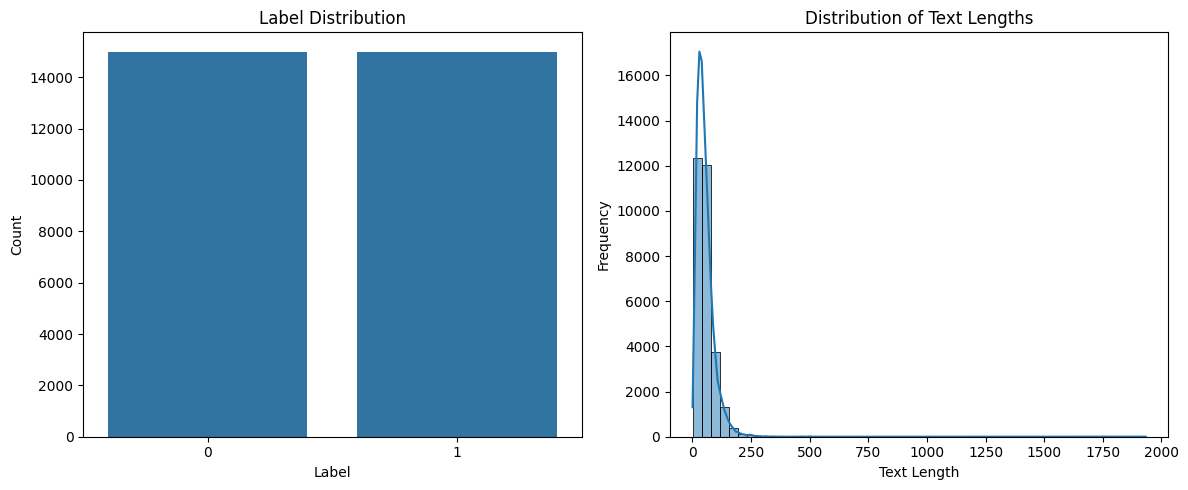

In [109]:
# Visualization
plt.figure(figsize=(12, 5))

# Plot for Label Distribution
plt.subplot(1, 2, 1)
label_counts = df['labels'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Plot for Distribution of Text Lengths
plt.subplot(1, 2, 2)
sns.histplot(df['input'].apply(len), bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 1.2. Text Length Statistics:
- **Count**: There are 29,998 texts in the dataset.
- **Mean Length**: The average text length is approximately 54 characters.
- **Standard Deviation**: Text lengths vary with a standard deviation of about 39 characters.
- **Minimum Length**: The shortest text has only 1 character.
- **Maximum Length**: The longest text consists of 1,933 characters.
- **25th Percentile (Q1)**: 25% of the texts have 29 characters or fewer.
- **Median (Q2)**: The median text length is 46 characters.
- **75th Percentile (Q3)**: 75% of the texts have 70 characters or fewer.


In [110]:
df.input.apply(len).describe()

count    29998.000000
mean        54.343323
std         39.138877
min          1.000000
25%         29.000000
50%         46.000000
75%         70.000000
max       1933.000000
Name: input, dtype: float64

# 2. Check for duplicate value

In [111]:
# Remove leading and trailing whitespaces
df.input = df.input.apply(str.strip)

In [112]:
df.input.size, df.input.unique().size

(29998, 24422)

In [113]:
# Check duplicate values and observe
duplicate_df = df[df.input.duplicated()]
duplicate_df # also check thorugh "variables" option in notrbook in vs code

,input,labels
259,,1
399,See you .,1
512,,1
621,A house .,1
629,,0
...,...,...
29984,first day,0
29992,I will try harder studying Russian and English...,0
29994,I am sure we all get more sophisticated as we ...,1
29996,It is okay to change the meaning though .,0


In [114]:
duplicate_input_count_df = df.input.value_counts()
duplicate_input_count_df.head(20)

input
                           110
Thank you .                 29
Nice to meet you .          15
Thank you                   13
.                           12
See you .                   12
Nice to meet you !          10
Hello everyone !             9
Thank you for reading .      9
thank you .                  9
Thank you for reading !      9
What do you think ?          9
I do not think so .          7
I am years old .             7
Introduce myself             7
How are you ?                6
Thanks for reading .         6
What should I do ?           6
I want to go again .         6
First Diary                  6
Name: count, dtype: int64

## 2.1 same input but differnet labels

In [71]:
# same input but differnet labels
df.iloc[399,:]

input     See you .
labels            1
Name: 399, dtype: object

In [72]:
df.iloc[5395,:]

input     See you .
labels            0
Name: 5395, dtype: object

In [73]:
# TODO: Should we remove same input with different labels or modify them?

In [74]:
# Duplicate values having different labels
empty_df = df[df.input == ""]
empty_df
# TODO: Should we remove this or not

,input,labels
254,,0
259,,1
512,,1
629,,0
1033,,1
...,...,...
27584,,1
27620,,0
27828,,1
28358,,1


# 3. "Lame"tization

In [75]:
import spacy

In [76]:
# !python -m spacy download en_core_web_sm
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [77]:
# Lemmatization with stopwords removal
# TODO: Since lemmatization is taking time, we can store data in a file and load it later
df['lem']=df.input.apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [78]:
df.input[50]

'And with their crossed eyes they throw sparks to burn the stupid guys that do not want to study .'

In [79]:
df.lem[50]

'cross eye throw spark burn stupid guy want study .'

In [80]:
df.input.size, df.input.unique().size, df.lem.unique().size

(29998, 24422, 20501)

In [81]:
lem_count_df = df.lem.value_counts()
lem_count_df.head(20)

lem
                   176
.                  164
?                  104
thank .             46
know .              33
!                   27
like .              23
think ?             23
, .                 23
nice meet .         22
thank read .        21
know ?              20
study English .     19
think .             18
tired .             18
year old .          17
thank               17
time .              16
interesting .       15
happy !             15
Name: count, dtype: int64

# 4. Document Term Matrix

In [82]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
cv=CountVectorizer(analyzer='word', token_pattern=r'\b\w+\b|\W')
# to consider only alphabetical words remove token_pattern=r'\b\w+\b|\W'

# TODO: Should we consider lemmatized column or input column
data=cv.fit_transform(df.lem)
# pd.DataFrame.sparse.from_spmatrix(data)
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head()

,,!,',",",-,.,?,aback,abandon,abbreviate,...,zombie,zome,zonbi,zone,zoo,zoom,zukkyun,zumba,zzz,zzzzz
0,5,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Word count in dataset
word_cnt_df = df_dtm.isin([1]).sum().to_frame().reset_index()
word_cnt_df.columns = ['word', 'count']
word_cnt_df.head(10)

,word,count
0,,3286
1,!,1491
2,',201
3,",",7478
4,-,996
5,.,22938
6,?,1587
7,aback,2
8,abandon,6
9,abbreviate,1


In [85]:
# count of speical characters
word_cnt_df[~word_cnt_df.word.str.isalpha()]

,word,count
0,,3286
1,!,1491
2,',201
3,",",7478
4,-,996
5,.,22938
6,?,1587
1584,comic_strip,19


# 5. Word Cloud

In [86]:

# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
from matplotlib import pyplot as plt

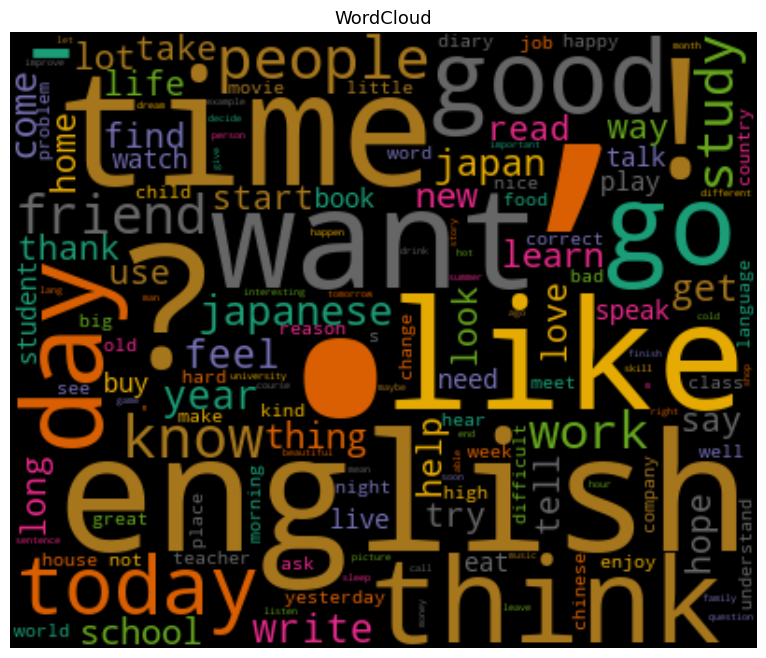

In [87]:
# TODO: Take wordcloud of 'Lemma' column
# Function for generating word clouds
word_cnt_dict = word_cnt_df.set_index('word').to_dict()['count']
wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(word_cnt_dict)
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('\n'.join(wrap("WordCloud",60)),fontsize=13)
plt.show()

# 6. Text Complexity Analysis

Dataset predominantly contains texts that are easy to read, with a significant variance in complexity. The presence of extreme scores suggests outliers or unique cases.

One common readability score is the:
**Flesch Reading Ease Score**:
- It is a readability test designed to indicate how easy or difficult a text passage is to understand.
- The score is based on the length of words and sentences.
- Higher scores indicate material that is easier to read;
- lower scores indicate passages that are more complex and harder to read.

In [91]:
from textstat import flesch_reading_ease

# Calculate the Flesch Reading Ease Score for each text
df['flesch_reading_ease'] = df['input'].apply(flesch_reading_ease)

# Overview of the Flesch Reading Ease scores
flesch_scores_overview = df['flesch_reading_ease'].describe()

flesch_scores_overview

count    29998.000000
mean        84.296394
std         26.972972
min       -724.790000
25%         71.820000
50%         86.710000
75%        100.240000
max        206.840000
Name: flesch_reading_ease, dtype: float64

Given the Flesch Reading Ease scores from dataset:
- **Mean (Average) Score:** <font color='red'>84.30</font> - On average, the texts in dataset are easy to read. This suggests that most of the content could be comfortably understood by the general public.
- **Standard Deviation:** <font color='red'>26.97</font> - This value indicates there is a wide variance in the readability of the texts. Some texts might be very easy to read, while others could be significantly more complex.
- **Minimum Score:** <font color='red'>724.79</font> - The presence of a highly negative score is unusual and might indicate an error in the data or an outlier, such as a very short text with many long words or an incorrect calculation. Normally, Flesch scores range from 0 to 100.
- **25th Percentile:** <font color='red'>71.82</font> - 25% of the texts have a score below 71.82, placing them in the "fairly easy to read" category or higher.
- Median (50th Percentile): 86.71 - Half of texts have a score below 86.71, which means the median text is easy to read, likely understandable by the average consumer.
- **75th Percentile:** <font color='red'>100.24</font> - 75% of the texts have a score below 100.24, and considering scores above 100 are exceptionally rare and typically indicative of very simple texts, it suggests that a significant portion of dataset is very easy to read.
- **Maximum Score:** <font color='red'>206.84</font> - This score is exceptionally high and outside the normal range for the Flesch Reading Ease score, suggesting it might be an outlier or the result of an atypical text structure.

# 7. Text Clustering

Group similar texts together using clustering techniques (e.g., K-means, hierarchical clustering) to discover patterns or themes without predefined categories.

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [94]:
# Ensure nltk resources are downloaded (stopwords, punkt)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [95]:
# Preprocess text: remove punctuation, lowercase, remove stopwords
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

In [102]:
# Apply preprocessing to the input text
df['processed_input'] = df['input'].apply(preprocess_text)

# Vectorizing the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_input'])
tfidf_matrix_norm = normalize(tfidf_matrix)

# Clustering with K-means
# Assuming an arbitrary choice of 5 clusters for demonstration
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix_norm)

# Adding cluster information to the DataFrame
df['cluster'] = clusters

# Check the distribution of texts across clusters
cluster_distribution = df['cluster'].value_counts()

cluster_distribution

cluster
0     26497
7       994
13      633
14      389
9       343
5       309
10      204
8       195
6       131
3       128
4        97
2        72
1         2
11        2
12        2
Name: count, dtype: int64

Cluster 0 contains the majority of the documents, with 26,497 entries, indicating that a large portion of the dataset shares common features, making them more similar to each other than to documents in other clusters.

### The distribution suggests that the clustering might be highly skewed towards one particular theme or set of features in the dataset.